<a href="https://colab.research.google.com/github/aswathi-859/project_nov/blob/master/Disaster_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/final_dataset_mini_balanced.csv')
df.head()

,text,label
0,Massive earthquake in Osaka. Power outages rep...,Earthquake
1,7.0 magnitude earthquake in Miami has triggere...,Earthquake
2,"""The Cape Town drought in South Africa has cau...",Drought
3,Aftershocks continue in Indonesia following ye...,Earthquake
4,The ground is shaking #emergency #earthquake #...,Earthquake


In [ ]:
df.tail()

,text,label
31082,The weather is always perfect when we go on a ...,Non-Disaster
31083,Seismic activity increasing at Mayon volcano. ...,Volcanic Eruption
31084,Typhoon Colin has left Tokyo without power. Da...,Typhoon
31085,Lost home to wildfire near Naples #wildfire #N...,Wildfire
31086,Groundwater levels dropping due to prolonged d...,NaN


In [ ]:
print(df.size)
print(df.shape)
print(df.ndim)
print(df.columns)

62174
(31087, 2)
2
Index(['text', 'label'], dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31087 entries, 0 to 31086
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    31087 non-null  object
 1   label   31086 non-null  object
dtypes: object(2)
memory usage: 485.9+ KB


In [ ]:
df.describe()

,text,label
count,31087,31086
unique,31087,11
top,Groundwater levels dropping due to prolonged d...,Hurricane
freq,1,2910


In [ ]:
for i in df.columns:
  print(df[i].unique(),i)
  print('*'*100)
  print(df[i].value_counts(),i)
  print('*'*100)

['Massive earthquake in Osaka. Power outages reported across the city. #emergencyResponse #earthquake Please RT!'
 '7.0 magnitude earthquake in Miami has triggered tsunami warnings along the coast. Please RT! @EmergencyAlert'
 '"The Cape Town drought in South Africa has caused water scarcity problems for the city, endangering marine life and tourism. Please remember to save water. #drought #watercrisis"'
 ...
 'Streets flooded in California as Typhoon Bonnie brings 15 inches of rain. #typhoon'
 'Communication networks down across Thailand as Cyclone Lisa continues its path.'
 '"Spent a day in Brazil and met a group of farmers who are struggling to make ends meet due to the severe drought. The lack of rain is taking a toll on their crops and their lives. #BrazilDrought #FarmersStruggle"'] text
****************************************************************************************************
text
"Spent a day in Brazil and met a group of farmers who are struggling to make ends meet due

In [ ]:
df.isna().sum()

,0
text,0
label,1


In [ ]:
df.ffill(inplace=True)
df.isna().sum()

,0
text,0
label,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
text=df['text']

In [ ]:
type(text)

pandas.core.series.Series

In [ ]:
import pandas as pd
pd.core.series.Series

pandas.core.series.Series

In [ ]:
text1=[]

In [ ]:
import re
for i in text:
  text = re.sub('[^a-zA-Z\s]+','',i)
  text1.append(text)

In [ ]:
from nltk.tokenize import word_tokenize
text1 = [ ' '.join([w for w in word_tokenize(x) if len(w)>=3]) for x in text1] # Use text1 instead of text
text1 = pd.Series(text1) # Convert text1 back to a Series
text1

,0
0,Massive earthquake Osaka Power outages reporte...
1,magnitude earthquake Miami has triggered tsuna...
2,The Cape Town drought South Africa has caused ...
3,Aftershocks continue Indonesia following yeste...
4,The ground shaking emergency earthquake Tokyo
...,...
31082,The weather always perfect when hike hikingwea...
31083,Seismic activity increasing Mayon volcano Offi...
31084,Typhoon Colin has left Tokyo without power Dam...
31085,Lost home wildfire near Naples wildfire Naples...


In [ ]:
text1

,0
0,Massive earthquake Osaka Power outages reporte...
1,magnitude earthquake Miami has triggered tsuna...
2,The Cape Town drought South Africa has caused ...
3,Aftershocks continue Indonesia following yeste...
4,The ground shaking emergency earthquake Tokyo
...,...
31082,The weather always perfect when hike hikingwea...
31083,Seismic activity increasing Mayon volcano Offi...
31084,Typhoon Colin has left Tokyo without power Dam...
31085,Lost home wildfire near Naples wildfire Naples...


In [ ]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
text1=text1.apply(lambda x:[stemmer.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda x:' '.join(x))

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text1=text1.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))

In [ ]:
text1

,0
0,massiv earthquak osaka power outag report acro...
1,magnitud earthquak miami trigger tsunami warn ...
2,cape town drought south africa caus water scar...
3,aftershock continu indonesia follow yesterday ...
4,ground shake emerg earthquak tokyo
...,...
31082,weather alway perfect hike hikingweath
31083,seismic activ increas mayon volcano offici can...
31084,typhoon colin left tokyo without power damag a...
31085,lost home wildfir near napl wildfir naplesfir


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data_vec=vec.fit_transform(text1)

In [ ]:
print(train_data_vec)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 267267 stored elements and shape (31087, 6168)>
  Coords	Values
  (0, 3318)	0.3037532298376534
  (0, 1586)	0.39839277545120394
  (0, 3841)	0.309609087884181
  (0, 4157)	0.26519364560825875
  (0, 3849)	0.3531956264799283
  (0, 4452)	0.22596903227478762
  (0, 29)	0.30352131325941345
  (0, 879)	0.2763927926383521
  (0, 1660)	0.444565192555666
  (0, 4093)	0.20215386934474305
  (1, 1586)	0.22519177722420503
  (1, 4093)	0.22853521406824928
  (1, 3259)	0.3232309729911917
  (1, 3408)	0.3424802245448726
  (1, 5580)	0.39928811833874933
  (1, 5589)	0.22656473263365146
  (1, 5879)	0.29075317433414866
  (1, 114)	0.4335404879863223
  (1, 931)	0.3437886237273326
  (1, 1655)	0.27173772808215585
  (2, 879)	0.15542923597057604
  (2, 4093)	0.1136810448666857
  (2, 709)	0.21540879563635534
  (2, 5530)	0.18530649758659856
  (2, 1498)	0.23325030896149107
  :	:
  (31083, 4719)	0.34837181394172223
  (31083, 2761)	0.3301142760445115
  (31083, 3789)	

In [ ]:
type(train_data_vec)

scipy.sparse._csr.csr_matrix

In [ ]:
y=df['label'].values
y

array(['Earthquake', 'Earthquake', 'Drought', ..., 'Typhoon', 'Wildfire',
       'Wildfire'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data_vec,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9971051785139916


In [ ]:
text1='"The Cape Town drought in South Africa has cau..'

In [ ]:
import numpy as np

In [ ]:
model.predict(vec.transform(np.array([text1])))

array(['Drought'], dtype=object)

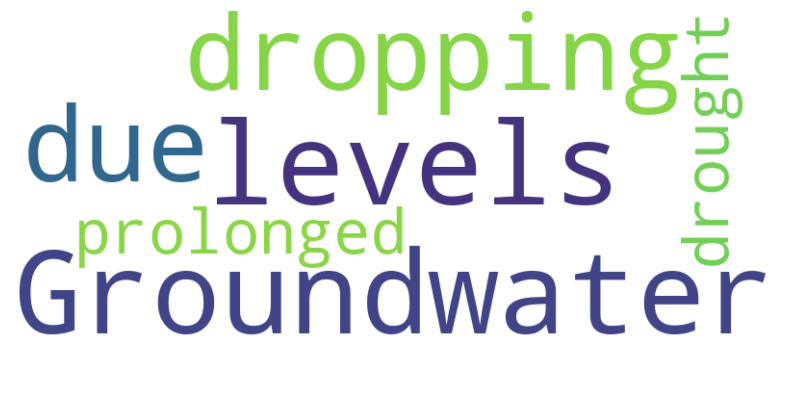

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text1 = "The Cape Town drought in South Africa has cau..	"

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import pickle

In [ ]:

with open('Disaster tweets.pkl', 'wb') as f:
    pickle.dump(model, f)
import pickle

with open('vec.pkl', 'wb') as f:
    pickle.dump(vec, f)